In [3]:
# RUN THIS CELL FIRST

import matplotlib.pyplot as plt
import numpy as np

# We often use Jupyter Notebooks to make plots that simulate what is happening in the sky. Do not worry if you have never worked with Python before - all the code has been written for you.

## As you know by now, the changes we see in stars' paths in the sky are due to the rotation of Earth beneath the Celestial Sphere. We will start off by mapping their apparent motion in the sky (aka their alt-az path) at our location. 

### Below are sets of empty **lists** for each star. **Lists** are data structures used to store ordered collections of items, separated by commas. For each star, fill in the lists with alt and az points in chronological order, separated by commas. e.g. a = [1, 2, 3, ...]


In [4]:
# Star 1

# Enter in your collected alt values for Altair
alt_1 = [55, 53, 50, 47, 44, 41, 38, 35, 32]
# Enter in your collected az values for Altair
az_1  = [185, 192, 200, 208, 217, 225, 233, 242, 250]

# Star 2

# Enter in your collected alt values for Deneb
alt_2 = [78, 77, 76, 75, 74, 73, 72, 71, 70]
# Enter in your collected az values for Deneb
az_2  = [50, 55, 60, 65, 70, 75, 80, 85, 90]

# Star 3

# Enter in your collected alt values for Kochab
alt_3 = [35, 34.5, 34, 34.2, 34.8, 35.5, 36, 36.2, 36]
# Enter in your collected az values for Kochab
az_3  = [15, 12, 10, 8, 6, 4, 2, 0, 358]

# Star 4

# Enter in your collected alt values for Polaris
alt_4 = [38.5, 38.6, 38.5, 38.4, 38.6, 38.5, 38.6, 38.5, 38.4]
# Enter in your collected az values for Polaris
az_4  = [0.5, 1.0, 1.2, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0]


In [5]:
def r_theta(alt, az):
    """Convert alt-az coordinates to r-theta coordinates for polar plotting."""
    r = np.array(alt)
    theta = np.deg2rad(np.array(az))
    return theta, r

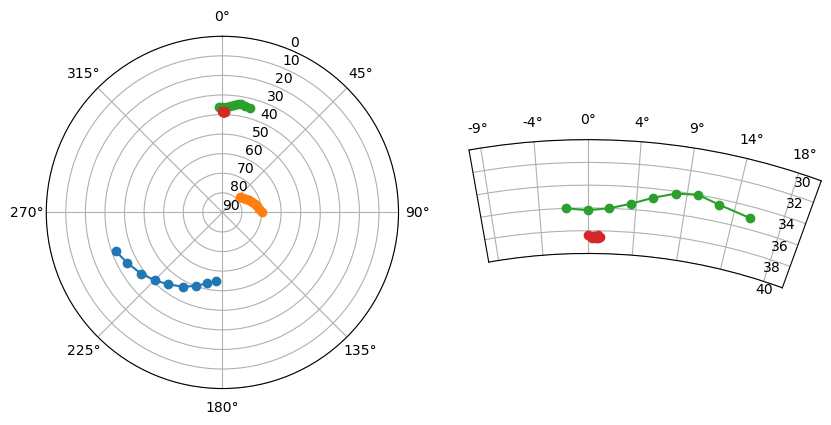

In [7]:
# r_min
# r_max
# theta_min
# theta_max


coords_1 = r_theta(alt_1, az_1)
coords_2 = r_theta(alt_2, az_2)
coords_3 = r_theta(alt_3, az_3)
coords_4 = r_theta(alt_4, az_4)


fig,[ax1,ax2] = plt.subplots(1,2,subplot_kw = {'projection':'polar'},figsize=(10,10))
# ax = plt.subplot(111, polar=True)
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)

ax1.plot(coords_1[0], coords_1[1], marker='o')
ax1.plot(coords_2[0], coords_2[1], marker='o')
ax1.plot(coords_3[0], coords_3[1], marker='o')
ax1.plot(coords_4[0], coords_4[1], marker='o')

ax2.plot(coords_1[0], coords_1[1], marker='o')
ax2.plot(coords_2[0], coords_2[1], marker='o')
ax2.plot(coords_3[0], coords_3[1], marker='o')
ax2.plot(coords_4[0], coords_4[1], marker='o')
ax2.set_thetalim(np.deg2rad(20),np.deg2rad(-10))
ax2.set_rlim(40,30)
ax2.set_rorigin(90)

ax1.set_rlim(90, 0)
plt.show()

## Converting between altitude and azimuth to hour angle and declination
### The rotation matrix in charge of this transformation only depends on the latitude of your location.

You should know the coordinates of Campbell Hall: \
latitude: 37.87 N\
longitude: 122.25 W

In [18]:
# This function converts from hour angle and declination to altitude and azimuth using a rotation matrix dependent on latitude
# Feel free to save this function for future use! (If you are an astronomy student, you will likely need to use it again)

def ha2top(lat):
    "(ha,dec) to (alt,az)"
    rot_mat = np.array([
        [-np.sin(lat), 0, np.cos(lat)],
        [0          , -1,           0],
        [ np.cos(lat), 0, np.sin(lat)],
    ])
    return rot_mat


def ra_dec(LST):
    "(ha,dec) to (alt,az)"
    rot_mat = np.array([
        [np.cos(LST), np.sin(LST), 0],
        [np.sin(LST), -np.cos(LST),      0],
        [ 0, 0, 1],
    ])
    return rot_mat




# This function creates a vector of topological coordinates for a single alt/az point.
# A vector is a mathematical object that represents a quantity with both magnitude and direction, 
# often written as a list of numbers (its components) that describe how far it points along each 
# coordinate axis in space. (You don't need to worry about this)

def vec_top(alt, az):
    v = np.array([
        np.cos(alt)*np.cos(az),
        np.cos(alt)*np.sin(az),
        np.sin(alt)
    ])
    return v

# Make sure to run this cell before the next one

In [22]:

LAT = 37.87 # Define your latitude here


# Trigonometric functions in numpy only take in radians, so we convert degrees to radians

LAT_rad = np.deg2rad(LAT)


# Here we create the rotation matrix that will be used to convert between (ha,dec) and (alt,az) by calling the function defined above
R = ha2top(LAT_rad)

# Here we create a topological vector for each alt/az point by passing in our lists of alt and az for a single star. I'll get you started with Altair.
vtop_1 = vec_top(np.deg2rad(alt_1), np.deg2rad(az_1))

# To transform from topological coords to hour angle and declination, we multiply our vecotor with the transpose of our rotation matrix. This is essentially 
# multiplying by the inverse of the rotation matrix since it transforms from Ha, dec to alt and az. Again, no need to worry about the linear algebra 
# for this class.
vha_1 = R.T @ vtop_1


Ha_1 = np.arctan2(vha_1[1], vha_1[0])
dec_1 = np.arcsin(vha_1[2]) 


In [20]:
# Since we are going to want to compute the Ha and Dec for each star, we will wrap this process in a function for repeated use.

def Ha_Dec(alt, az, lat):
    R = ha2top(np.deg2rad(lat))
    vtop = vec_top(np.deg2rad(alt), np.deg2rad(az))
    vha = R.T @ vtop
    return np.arctan2(vha[1], vha[0]), np.arcsin(vha[2]) 


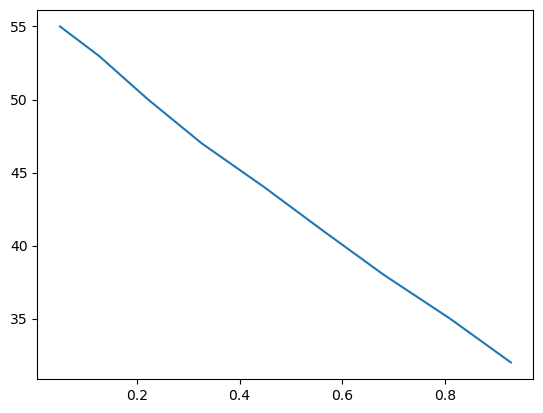

In [23]:
ax = plt.subplot()

ax.plot(Ha_1, alt_1)

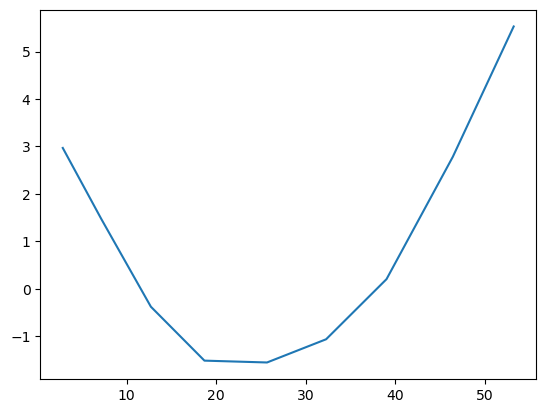

In [24]:
ax = plt.subplot()

ax.plot(np.rad2deg(Ha_1), np.rad2deg(dec_1))

In [25]:
print(Ha_1[0], np.rad2deg(dec_1[0]))
# when directly above, gives latitude of NCH

0.05007859470666016 2.968847874222582


In [26]:
print(np.rad2deg(Ha_1[1]), np.rad2deg(dec_1[1]))

7.190301102002089 1.4649453996291268


In [ ]:
lst_samples = [
    "20:00:00",
    "20:15:02",
    "20:30:05",
    "20:45:07",
    "21:00:10",
    "21:15:12",
    "21:30:15",
    "21:45:17",
    "22:00:20",
]

RA = (LST - Ha_altair) % (2*np.pi)